In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\user\\Desktop\\data sets\\Admission_Predict_Ver1.1.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.drop('Serial No.',axis=1,inplace = True)

In [7]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [9]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=25)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [12]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [13]:
model = Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(loss="mean_squared_error",optimizer='Adam')

In [16]:
history =model.fit(x_train_scaled,y_train,epochs = 1000,validation_split=0.2)

Epoch 1/1000
10/10 [==============================] - 1s 35ms/step - loss: 0.5359 - val_loss: 0.4623
Epoch 2/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.4006 - val_loss: 0.3136
Epoch 3/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.2515 - val_loss: 0.1805
Epoch 4/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1348 - val_loss: 0.0855
Epoch 5/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0598 - val_loss: 0.0357
Epoch 6/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0274 - val_loss: 0.0191
Epoch 7/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0192 - val_loss: 0.0168
Epoch 8/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0187 - val_loss: 0.0164
Epoch 9/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0181 - val_loss: 0.0152
Epoch 10/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0170 - val_loss: 0.014

10/10 [==============================] - 0s 7ms/step - loss: 0.0049 - val_loss: 0.0041
Epoch 83/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0049 - val_loss: 0.0040
Epoch 84/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0048 - val_loss: 0.0041
Epoch 85/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0040
Epoch 86/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0040
Epoch 87/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0040
Epoch 88/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0040
Epoch 89/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0047 - val_loss: 0.0040
Epoch 90/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0047 - val_loss: 0.0040
Epoch 91/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0047 - val_loss: 0.0040
Epoc

10/10 [==============================] - 0s 7ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 163/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0037 - val_loss: 0.0034
Epoch 164/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 165/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 166/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0037 - val_loss: 0.0034
Epoch 167/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 168/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 169/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 170/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 171/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0037 - val_loss: 0.

10/10 [==============================] - 0s 7ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 243/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 244/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 245/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 246/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 247/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 248/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 249/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 250/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 251/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0035 - val_loss: 0.

10/10 [==============================] - 0s 7ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 323/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 324/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 325/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 326/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 327/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 328/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 329/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 330/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 331/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0034 - val_loss: 0.

10/10 [==============================] - 0s 7ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 403/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 404/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 405/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 406/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0035
Epoch 407/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 408/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 409/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 410/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 411/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0035 - val_loss: 0.

10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 483/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 484/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 485/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 486/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 487/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 488/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 489/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 490/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 491/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.

10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 563/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 564/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 565/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 566/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 567/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 568/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 569/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 570/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 571/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.

10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 643/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 644/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 645/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 646/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 647/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 648/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 649/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 650/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 651/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0032 - val_loss: 0.

10/10 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 723/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 724/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 725/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 726/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 727/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 728/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 729/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 730/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 731/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0032 - val_loss: 0.

10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 803/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 804/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 805/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 806/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 807/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 808/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 809/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 810/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 811/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.

10/10 [==============================] - 0s 6ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 883/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 884/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 885/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 886/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 887/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 888/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 889/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0035
Epoch 890/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 891/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.

10/10 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 963/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0035
Epoch 964/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 965/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 966/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 967/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 968/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 969/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 970/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 971/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.

In [17]:
y_pred = model.predict(x_test_scaled)

4/4 [==============================] - 0s 2ms/step


In [18]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8031193566978644

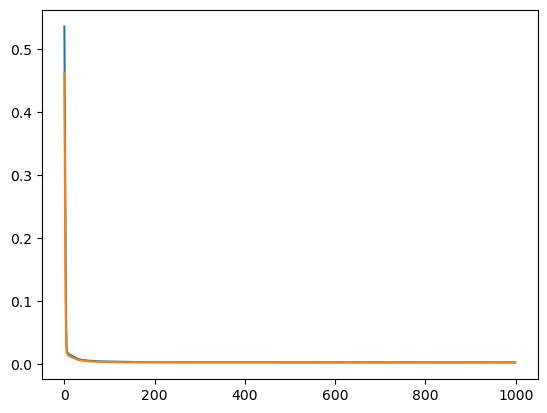

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])